# Car Evaluation Prediction

## Objective: Predict Type of the car if accurate or not by classification

### Data Source: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

### Metadata:
- buying price                                                                                                             
- maintenance cost                                                                                                                 
- number of doors                                                                                                                  
- number of persons                                                                                                                  
- lug_boot                                                                                                                 
- safety                                                                                                                 
- decision                                                                                                                 


### Necessary Libraries

In [36]:
#Data Manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import category_encoders as ce
#Evaluation
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score


### Data Loading

In [11]:
cars = pd.read_csv("/mnt/d/Self_Study/DEPI/4-ML/datasets/car_evaluation.csv",header=None)

In [14]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
cars.columns = col_names

### Exploring

In [15]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
cars.shape
# 1728 rows and 7 columns

(1728, 7)

In [ ]:
cars.info()
# No null values and all are object type
# 7 Categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
cars.isnull().sum()
# No null values

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [20]:
cars.duplicated().sum()
# No duplicate values

np.int64(0)

In [ ]:
# Make table includes value counts of each column
for column in cars.columns:
    print(cars[column].value_counts())
    print("\n")


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64


persons
2       576
4       576
more    576
Name: count, dtype: int64


lug_boot
small    576
med      576
big      576
Name: count, dtype: int64


safety
low     576
med     576
high    576
Name: count, dtype: int64


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64




In [ ]:
px.pie(cars, names='class', title='Car Class Distribution')

### Preprocessing

In [26]:
X = cars.drop('class', axis=1)
y = cars['class']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
x_train.shape, x_test.shape

((1157, 6), (571, 6))

In [31]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [32]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [40]:
y_train.value_counts()

class
unacc    813
acc      255
good      49
vgood     40
Name: count, dtype: int64

In [41]:
y_test.value_counts()

class
unacc    397
acc      129
vgood     25
good      20
Name: count, dtype: int64

#### Upsampling small classes

In [56]:
# Perform Over sampling on training data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [60]:
# Perform Over sampling on training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(x_train, y_train)

### Model Selection and Training

In [ ]:
#Decision Tree Classifier with Gini Index Before Upsampling
dt_gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_gini_model.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
#Decision Tree Classifier with Gini Index After Upsampling
dt_gini_model_resampled = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_gini_model_resampled.fit(x_train_resampled, y_train_resampled)



,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [61]:
dt_gini_model_resampled_smote = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_gini_model_resampled_smote.fit(x_train_resampled_smote, y_train_resampled_smote)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


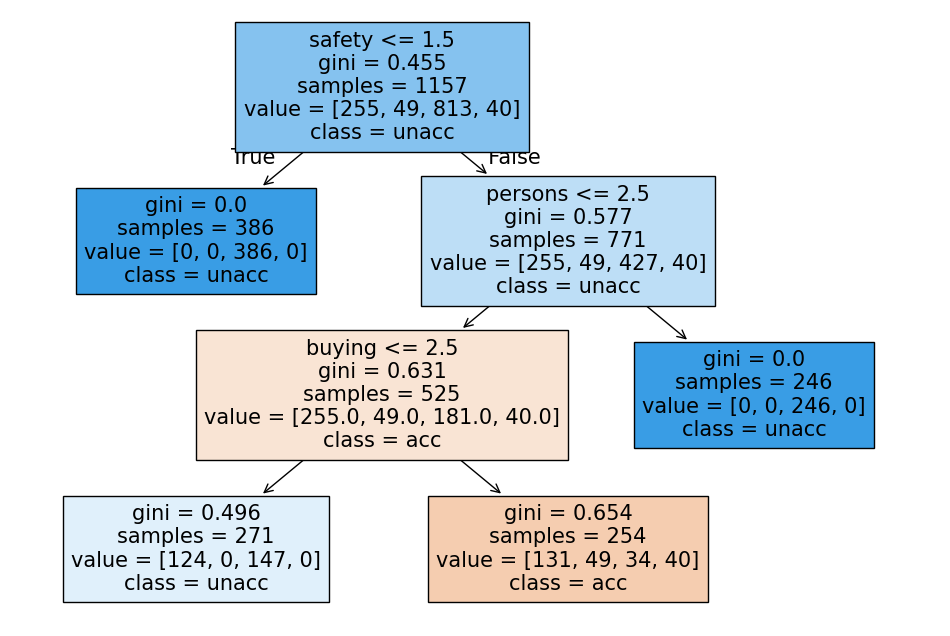

In [53]:
#Visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt_gini_model, filled=True, feature_names=x_train.columns, class_names=dt_gini_model.classes_)
plt.show()

In [35]:
dt_gini_y_pred = dt_gini_model.predict(x_test)

In [44]:
dt_gini_train_y_pred = dt_gini_model.predict(x_train)

In [58]:
dt_gini_y_pred_resampled = dt_gini_model_resampled.predict(x_test)

In [62]:
dt_gini_y_pred_resampled_smote = dt_gini_model_resampled_smote.predict(x_test)

### Evaluation

In [39]:
dt_accuracy = accuracy_score(y_test, dt_gini_y_pred)
print(f"Decision Tree Gini Accuracy: {dt_accuracy:.4f}")

Decision Tree Gini Accuracy: 0.8021


In [59]:
dt_accuracy_resampled = accuracy_score(y_test, dt_gini_y_pred_resampled)
print(f"Decision Tree Gini Accuracy After Upsampling: {dt_accuracy_resampled:.4f}")


Decision Tree Gini Accuracy After Upsampling: 0.6200


In [63]:
dt_accuracy_resampled_smote = accuracy_score(y_test, dt_gini_y_pred_resampled_smote)
print(f"Decision Tree Gini Accuracy After Upsampling: {dt_accuracy_resampled_smote:.4f}")


Decision Tree Gini Accuracy After Upsampling: 0.6778


In [46]:
accuracy_score(y_train, dt_gini_train_y_pred)

0.7865168539325843

### ------------------------------------------------------------------------------------------------------------

In [38]:
dt_clsf_rprt = classification_report(y_test, dt_gini_y_pred,digits=4)
print(dt_clsf_rprt)

              precision    recall  f1-score   support

         acc     0.5615    0.5659    0.5637       129
        good     0.0000    0.0000    0.0000        20
       unacc     0.8730    0.9698    0.9189       397
       vgood     0.0000    0.0000    0.0000        25

    accuracy                         0.8021       571
   macro avg     0.3586    0.3839    0.3706       571
weighted avg     0.7338    0.8021    0.7662       571



### ------------------------------------------------------------------------------------------------------------


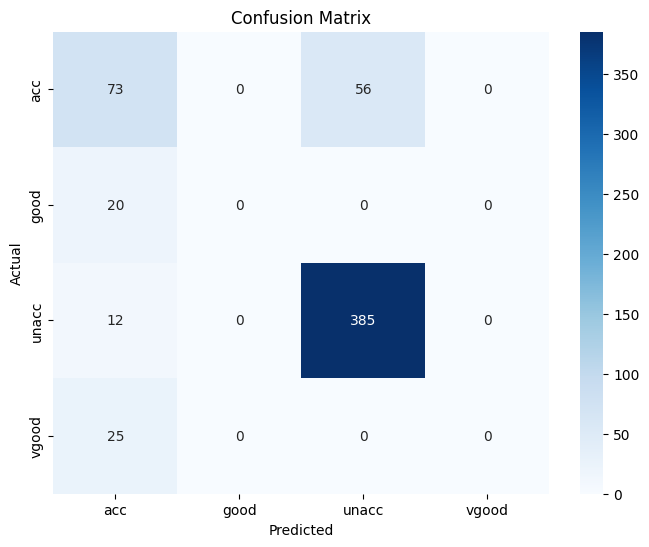

In [54]:
#Confusion Matrix
cm = confusion_matrix(y_test, dt_gini_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_gini_model.classes_, yticklabels=dt_gini_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()